## Case Study: Stock Price Prediction 


<h4> The Case study is to predict Next day stock price [Adj Close Price] using  regression analysis</h4>
<p>
    We will be using Nifty 50 data for this case study<br>
    The filename '^NSEI.csv' contains the data<br>
    You need to generate  technical indicators as given below as  Features for converting Time Series to Supervised Learning Problem <br>
   <a href='https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/'> Convert time Series to Supervised Learning</a><p>
    <ul>
        <li> Moving Averages (Example Given : 3Period Moving Avearage (3MA)) </li>
        <li> Previous Day Returns </li>
        <li> Relative Stock returns </li>
    </ul>
<br>
Then you need to Train a Supervised learning algorithm and perform prediction.<br>
<a href='https://blog.quantinsti.com/random-forest-algorithm-in-python/'>Example for your Refrence </a><br>
<b> Make sure  to shift the feature by 1 period so that you will have data from t-1 period to predict price at t (look ahead bias) </b>

<strong> Please consider Testing Period after  01-01-2019 </strong>
</p>
<p>
    <b> Metrics for Evaluation </b>
    <ul>
        <li><strong> RMSE </strong></li>
     </ul>
</p>
<p> Some additional Documention for your help
    <ul>
        <li><a href='https://pandas.pydata.org/docs/'> Pandas Documentation </a> </li>
        <li><a href='https://scikit-learn.org/stable/'> Scikit Learn </a></li>
        </ul>
        </p>

In [85]:
import pandas as pd
import numpy as np
##### Import Other Required Library ###########

In [86]:
# Reading the Stock 
df=pd.read_csv("^NSEI.csv")

In [88]:
# Getting the end of the data
df.tail()

Date          Open          High           Low         Close  \
3066  2020-02-20  12119.000000  12152.000000  12071.450195  12080.849609   
3067  2020-02-24  12012.549805  12012.549805  11813.400391  11829.400391   
3068  2020-02-25  11877.500000  11883.049805  11779.900391  11797.900391   
3069  2020-02-26  11738.549805  11783.250000  11639.599609  11678.500000   
3070  2020-02-27  11661.250000  11663.849609  11536.700195  11633.299805   

         Adj Close    Volume  
3066  12080.849609  502600.0  
3067  11829.400391  490800.0  
3068  11797.900391  461000.0  
3069  11678.500000  567600.0  
3070  11633.299805  608600.0

In [89]:
# Get information about the data Type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3071 non-null   object 
 1   Open       3039 non-null   float64
 2   High       3039 non-null   float64
 3   Low        3039 non-null   float64
 4   Close      3039 non-null   float64
 5   Adj Close  3039 non-null   float64
 6   Volume     3039 non-null   float64
dtypes: float64(6), object(1)
memory usage: 168.1+ KB


In [90]:
# Converting Date column type from object to datetime. Converting the DF to Time Series Data Frame.
df['Date']= pd.to_datetime(df['Date']) 

In [91]:
# Can see the Date column Dtype changed to datetime64 from object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3071 non-null   datetime64[ns]
 1   Open       3039 non-null   float64       
 2   High       3039 non-null   float64       
 3   Low        3039 non-null   float64       
 4   Close      3039 non-null   float64       
 5   Adj Close  3039 non-null   float64       
 6   Volume     3039 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 168.1 KB


In [92]:
# Sorting by Date
df = df.sort_values('Date')

In [93]:
# Setting the Data column as Index
df.set_index('Date', inplace=True)

In [94]:
# Check the Data Frames and confirm if Index is set properly
df

Open          High           Low         Close  \
Date                                                                 
2007-09-17   4518.450195   4549.049805   4482.850098   4494.649902   
2007-09-18   4494.100098   4551.799805   4481.549805   4546.200195   
2007-09-19   4550.250000   4739.000000   4550.250000   4732.350098   
2007-09-20   4734.850098   4760.850098   4721.149902   4747.549805   
2007-09-21   4752.950195   4855.700195   4733.700195   4837.549805   
...                  ...           ...           ...           ...   
2020-02-20  12119.000000  12152.000000  12071.450195  12080.849609   
2020-02-24  12012.549805  12012.549805  11813.400391  11829.400391   
2020-02-25  11877.500000  11883.049805  11779.900391  11797.900391   
2020-02-26  11738.549805  11783.250000  11639.599609  11678.500000   
2020-02-27  11661.250000  11663.849609  11536.700195  11633.299805   

               Adj Close    Volume  
Date                                
2007-09-17   4494.649902       0.0  
2007-09-18   4546.200195       0.0  
2007-09-19   4732.350098       0.0  
2007-09-20   4747.549805       0.0  
2007-09-21   4837.549805       0.0  
...                  ...       ...  
2020-02-20  12080.849609  502600.0  
2020-02-24  11829.400391  490800.0  
2020-02-25  11797.900391  461000.0  
2020-02-26  11678.500000  567600.0  
2020-02-27  11633.299805  608600.0  

[3071 rows x 6 columns]

In [95]:
# Check for Null values in each column.
df.isna().sum()

Open         32
High         32
Low          32
Close        32
Adj Close    32
Volume       32
dtype: int64

In [96]:
# fill/replace the null values with previous day values.
df = df.fillna(method='ffill')

In [97]:
# Confirmed that there are no null values.
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [98]:
# Created a new DataFrame vdf starting from data 19-01-2013, because Volume column in the original data is '0' zero till 18-01-2013
# I have removed all data till 18-01-2013 for rest of the analysis.
vdf = df['19-01-2013':]

In [99]:
# Checking the stats of vdf and observed Volumn has few values as '0' zero.
vdf.describe()

Open          High           Low         Close     Adj Close  \
count   1750.000000   1750.000000   1750.000000   1750.000000   1750.000000   
mean    8875.608119   8914.809094   8821.927050   8868.424434   8868.424434   
std     1901.625459   1904.016325   1892.837965   1898.107065   1898.107065   
min     5233.450195   5317.700195   5118.850098   5285.000000   5285.000000   
25%     7695.512451   7728.912597   7627.737549   7685.212646   7685.212646   
50%     8586.975098   8624.474609   8542.125000   8584.825195   8584.825195   
75%    10607.649902  10638.212158  10545.862549  10595.587891  10595.587891   
max    12430.500000  12430.500000  12321.400391  12362.299805  12362.299805   

             Volume  
count  1.750000e+03  
mean   2.337761e+05  
std    1.492670e+05  
min    0.000000e+00  
25%    1.490500e+05  
50%    1.873000e+05  
75%    2.610500e+05  
max    1.414800e+06

In [100]:
# Also observed few outliers in Volumn column
vdf[vdf['Volume']<1000]

Open          High           Low         Close  \
Date                                                                 
2017-04-17   9144.750000   9160.000000   9120.250000   9139.299805   
2018-04-27  10651.650391  10719.799805  10647.549805  10692.299805   
2018-05-21  10616.700195  10621.700195  10505.799805  10516.700195   
2018-07-06  10744.150391  10816.349609  10735.049805  10772.650391   
2018-07-13  11056.900391  11071.349609  10999.750000  11018.900391   
2018-08-10  11474.950195  11478.750000  11419.650391  11429.500000   
2018-09-11  11476.849609  11479.400391  11274.000000  11287.500000   
2018-09-24  11164.400391  11170.150391  10943.599609  10967.400391   
2018-10-10  10331.849609  10482.349609  10318.250000  10460.099609   
2018-10-25  10135.049805  10166.599609  10079.299805  10124.900391   
2018-11-06  10552.000000  10600.250000  10491.450195  10530.000000   
2018-11-15  10580.599609  10646.500000  10557.500000  10616.700195   
2018-11-26  10568.299805  10637.799805  10489.750000  10628.599609   
2018-11-27  10621.450195  10695.150391  10596.349609  10685.599609   
2019-07-23  11372.250000  11398.099609  11303.150391  11331.049805   
2019-08-13  11139.400391  11145.900391  10901.599609  10925.849609   
2019-08-14  11003.250000  11077.349609  10935.849609  11029.400391   
2019-08-16  11043.650391  11068.549805  10924.299805  11047.799805   
2019-08-19  11094.799805  11146.900391  11037.849609  11053.900391   
2019-08-20  11047.650391  11049.849609  10986.700195  11017.000000   
2019-08-21  11018.150391  11034.200195  10906.650391  10918.700195   
2019-08-22  10905.299805  10908.250000  10718.299805  10741.349609   
2019-08-23  10699.599609  10862.549805  10637.150391  10829.349609   
2019-08-26  11000.299805  11070.299805  10756.549805  11057.849609   
2019-08-27  11106.549805  11141.750000  11049.500000  11105.349609   
2019-08-28  11101.299805  11129.650391  10987.650391  11046.099609   
2020-01-22  12218.349609  12225.049805  12087.900391  12106.900391   
2020-02-17  12131.799805  12159.599609  12037.000000  12045.799805   

               Adj Close  Volume  
Date                              
2017-04-17   9139.299805     0.0  
2018-04-27  10692.299805     0.0  
2018-05-21  10516.700195     0.0  
2018-07-06  10772.650391     0.0  
2018-07-13  11018.900391     0.0  
2018-08-10  11429.500000     0.0  
2018-09-11  11287.500000     0.0  
2018-09-24  10967.400391     0.0  
2018-10-10  10460.099609     0.0  
2018-10-25  10124.900391     0.0  
2018-11-06  10530.000000     0.0  
2018-11-15  10616.700195     0.0  
2018-11-26  10628.599609     0.0  
2018-11-27  10685.599609     0.0  
2019-07-23  11331.049805   500.0  
2019-08-13  10925.849609   600.0  
2019-08-14  11029.400391   500.0  
2019-08-16  11047.799805   500.0  
2019-08-19  11053.900391   400.0  
2019-08-20  11017.000000   400.0  
2019-08-21  10918.700195   600.0  
2019-08-22  10741.349609   700.0  
2019-08-23  10829.349609   700.0  
2019-08-26  11057.849609   700.0  
2019-08-27  11105.349609   700.0  
2019-08-28  11046.099609   500.0  
2020-01-22  12106.900391   500.0  
2020-02-17  12045.799805     0.0

In [101]:
# replaced outliers and zeros with null.
vdf['Volume'].values[vdf['Volume'] < 1000] = np.nan

In [102]:
# Check if above command has generated the null values.
vdf[vdf['Volume'].isnull()]

Open          High           Low         Close  \
Date                                                                 
2017-04-17   9144.750000   9160.000000   9120.250000   9139.299805   
2018-04-27  10651.650391  10719.799805  10647.549805  10692.299805   
2018-05-21  10616.700195  10621.700195  10505.799805  10516.700195   
2018-07-06  10744.150391  10816.349609  10735.049805  10772.650391   
2018-07-13  11056.900391  11071.349609  10999.750000  11018.900391   
2018-08-10  11474.950195  11478.750000  11419.650391  11429.500000   
2018-09-11  11476.849609  11479.400391  11274.000000  11287.500000   
2018-09-24  11164.400391  11170.150391  10943.599609  10967.400391   
2018-10-10  10331.849609  10482.349609  10318.250000  10460.099609   
2018-10-25  10135.049805  10166.599609  10079.299805  10124.900391   
2018-11-06  10552.000000  10600.250000  10491.450195  10530.000000   
2018-11-15  10580.599609  10646.500000  10557.500000  10616.700195   
2018-11-26  10568.299805  10637.799805  10489.750000  10628.599609   
2018-11-27  10621.450195  10695.150391  10596.349609  10685.599609   
2019-07-23  11372.250000  11398.099609  11303.150391  11331.049805   
2019-08-13  11139.400391  11145.900391  10901.599609  10925.849609   
2019-08-14  11003.250000  11077.349609  10935.849609  11029.400391   
2019-08-16  11043.650391  11068.549805  10924.299805  11047.799805   
2019-08-19  11094.799805  11146.900391  11037.849609  11053.900391   
2019-08-20  11047.650391  11049.849609  10986.700195  11017.000000   
2019-08-21  11018.150391  11034.200195  10906.650391  10918.700195   
2019-08-22  10905.299805  10908.250000  10718.299805  10741.349609   
2019-08-23  10699.599609  10862.549805  10637.150391  10829.349609   
2019-08-26  11000.299805  11070.299805  10756.549805  11057.849609   
2019-08-27  11106.549805  11141.750000  11049.500000  11105.349609   
2019-08-28  11101.299805  11129.650391  10987.650391  11046.099609   
2020-01-22  12218.349609  12225.049805  12087.900391  12106.900391   
2020-02-17  12131.799805  12159.599609  12037.000000  12045.799805   

               Adj Close  Volume  
Date                              
2017-04-17   9139.299805     NaN  
2018-04-27  10692.299805     NaN  
2018-05-21  10516.700195     NaN  
2018-07-06  10772.650391     NaN  
2018-07-13  11018.900391     NaN  
2018-08-10  11429.500000     NaN  
2018-09-11  11287.500000     NaN  
2018-09-24  10967.400391     NaN  
2018-10-10  10460.099609     NaN  
2018-10-25  10124.900391     NaN  
2018-11-06  10530.000000     NaN  
2018-11-15  10616.700195     NaN  
2018-11-26  10628.599609     NaN  
2018-11-27  10685.599609     NaN  
2019-07-23  11331.049805     NaN  
2019-08-13  10925.849609     NaN  
2019-08-14  11029.400391     NaN  
2019-08-16  11047.799805     NaN  
2019-08-19  11053.900391     NaN  
2019-08-20  11017.000000     NaN  
2019-08-21  10918.700195     NaN  
2019-08-22  10741.349609     NaN  
2019-08-23  10829.349609     NaN  
2019-08-26  11057.849609     NaN  
2019-08-27  11105.349609     NaN  
2019-08-28  11046.099609     NaN  
2020-01-22  12106.900391     NaN  
2020-02-17  12045.799805     NaN

In [103]:
# fill/replace the null values with previous day values. I didnt use the mean/median to fill the null values.
vdf = vdf.fillna(method='ffill')
vdf.describe()

Open          High           Low         Close     Adj Close  \
count   1750.000000   1750.000000   1750.000000   1750.000000   1750.000000   
mean    8875.608119   8914.809094   8821.927050   8868.424434   8868.424434   
std     1901.625459   1904.016325   1892.837965   1898.107065   1898.107065   
min     5233.450195   5317.700195   5118.850098   5285.000000   5285.000000   
25%     7695.512451   7728.912597   7627.737549   7685.212646   7685.212646   
50%     8586.975098   8624.474609   8542.125000   8584.825195   8584.825195   
75%    10607.649902  10638.212158  10545.862549  10595.587891  10595.587891   
max    12430.500000  12430.500000  12321.400391  12362.299805  12362.299805   

             Volume  
count  1.750000e+03  
mean   2.404996e+05  
std    1.491161e+05  
min    3.020000e+04  
25%    1.519000e+05  
50%    1.892000e+05  
75%    2.696750e+05  
max    1.414800e+06

In [104]:
vdf.min()

Open          5233.450195
High          5317.700195
Low           5118.850098
Close         5285.000000
Adj Close     5285.000000
Volume       30200.000000
dtype: float64

In [105]:
#Assigning vdf back to df
df = pd.DataFrame(vdf)
df

Open          High           Low         Close  \
Date                                                                 
2013-01-21   6085.750000   6094.350098   6065.100098   6082.299805   
2013-01-22   6080.149902   6101.299805   6040.500000   6048.500000   
2013-01-23   6052.850098   6069.799805   6021.149902   6054.299805   
2013-01-24   6046.200195   6065.299805   6007.850098   6019.350098   
2013-01-25   6024.500000   6080.549805   6014.450195   6074.649902   
...                  ...           ...           ...           ...   
2020-02-20  12119.000000  12152.000000  12071.450195  12080.849609   
2020-02-24  12012.549805  12012.549805  11813.400391  11829.400391   
2020-02-25  11877.500000  11883.049805  11779.900391  11797.900391   
2020-02-26  11738.549805  11783.250000  11639.599609  11678.500000   
2020-02-27  11661.250000  11663.849609  11536.700195  11633.299805   

               Adj Close    Volume  
Date                                
2013-01-21   6082.299805  130900.0  
2013-01-22   6048.500000  129000.0  
2013-01-23   6054.299805  137000.0  
2013-01-24   6019.350098  185200.0  
2013-01-25   6074.649902  147600.0  
...                  ...       ...  
2020-02-20  12080.849609  502600.0  
2020-02-24  11829.400391  490800.0  
2020-02-25  11797.900391  461000.0  
2020-02-26  11678.500000  567600.0  
2020-02-27  11633.299805  608600.0  

[1750 rows x 6 columns]

In [106]:
# Adding new row to with Index Date 02/28/2020 to hold the shifted values when generating features  
newdate = pd.date_range('02/28/2020', periods=1, freq='B')
newDF = df.reindex(newdate)

In [107]:
df = df.append(newDF)

In [108]:
df

Open          High           Low         Close  \
2013-01-21   6085.750000   6094.350098   6065.100098   6082.299805   
2013-01-22   6080.149902   6101.299805   6040.500000   6048.500000   
2013-01-23   6052.850098   6069.799805   6021.149902   6054.299805   
2013-01-24   6046.200195   6065.299805   6007.850098   6019.350098   
2013-01-25   6024.500000   6080.549805   6014.450195   6074.649902   
...                  ...           ...           ...           ...   
2020-02-24  12012.549805  12012.549805  11813.400391  11829.400391   
2020-02-25  11877.500000  11883.049805  11779.900391  11797.900391   
2020-02-26  11738.549805  11783.250000  11639.599609  11678.500000   
2020-02-27  11661.250000  11663.849609  11536.700195  11633.299805   
2020-02-28           NaN           NaN           NaN           NaN   

               Adj Close    Volume  
2013-01-21   6082.299805  130900.0  
2013-01-22   6048.500000  129000.0  
2013-01-23   6054.299805  137000.0  
2013-01-24   6019.350098  185200.0  
2013-01-25   6074.649902  147600.0  
...                  ...       ...  
2020-02-24  11829.400391  490800.0  
2020-02-25  11797.900391  461000.0  
2020-02-26  11678.500000  567600.0  
2020-02-27  11633.299805  608600.0  
2020-02-28           NaN       NaN  

[1751 rows x 6 columns]

In [109]:
#### Generating a Sample Feature for your Reference 3period moving average
df['3MA']=df['Adj Close'].rolling(3).mean()
### shifting Feature 3MA  so that features at t-1 will be used to predict close at t
df['3MA']=df['3MA'].shift(1)

In [110]:
# Generate More technical Features

In [111]:
# Generated Feature - Previous Day Returns and shifted it 1 period 
df['PrevDay Return']=df['Adj Close']/df['Adj Close'].shift(1)-1
df['PrevDay Return']=df['PrevDay Return'].shift(1)
#Same result as above 
#df['pct_change'] = df['Adj Close'].pct_change()
#df['pct_change']=df['pct_change'].shift(1)
#df = df.drop(columns=['pct_change'])

In [112]:
# Generated Feature - Difference between daily Highs and Lows and shifted it 1 period
df['Daily_Volatility']=(df['High']-df['Low'])/df['Low']
df['Daily_Volatility']=df['Daily_Volatility'].shift(1)

In [113]:
# Generated Feature - Difference between daily Open and Close and shifted it 1 period
df['Open_Close'] = (df['Open'] - df['Close'])/df['Open']
df['Open_Close']=df['Open_Close'].shift(1)

In [114]:
# Generated Feature - OBV On-Balance Volume Indicator
df['OBV'] = np.where(df['Adj Close'] > df['Adj Close'].shift(1), df['Volume'], np.where(df['Adj Close'] < df['Adj Close'].shift(1), -df['Volume'], 0)).cumsum()

In [115]:
df

Open          High           Low         Close  \
2013-01-21   6085.750000   6094.350098   6065.100098   6082.299805   
2013-01-22   6080.149902   6101.299805   6040.500000   6048.500000   
2013-01-23   6052.850098   6069.799805   6021.149902   6054.299805   
2013-01-24   6046.200195   6065.299805   6007.850098   6019.350098   
2013-01-25   6024.500000   6080.549805   6014.450195   6074.649902   
...                  ...           ...           ...           ...   
2020-02-24  12012.549805  12012.549805  11813.400391  11829.400391   
2020-02-25  11877.500000  11883.049805  11779.900391  11797.900391   
2020-02-26  11738.549805  11783.250000  11639.599609  11678.500000   
2020-02-27  11661.250000  11663.849609  11536.700195  11633.299805   
2020-02-28           NaN           NaN           NaN           NaN   

               Adj Close    Volume           3MA  PrevDay Return  \
2013-01-21   6082.299805  130900.0           NaN             NaN   
2013-01-22   6048.500000  129000.0           NaN             NaN   
2013-01-23   6054.299805  137000.0           NaN       -0.005557   
2013-01-24   6019.350098  185200.0   6061.699870        0.000959   
2013-01-25   6074.649902  147600.0   6040.716634       -0.005773   
...                  ...       ...           ...             ...   
2020-02-24  11829.400391  490800.0  12066.416667       -0.003715   
2020-02-25  11797.900391  461000.0  12012.050130       -0.020814   
2020-02-26  11678.500000  567600.0  11902.716797       -0.002663   
2020-02-27  11633.299805  608600.0  11768.600261       -0.010120   
2020-02-28           NaN       NaN  11703.233399       -0.003870   

            Daily_Volatility  Open_Close         OBV  
2013-01-21               NaN         NaN         0.0  
2013-01-22          0.004823    0.000567   -129000.0  
2013-01-23          0.010065    0.005205      8000.0  
2013-01-24          0.008080   -0.000240   -177200.0  
2013-01-25          0.009562    0.004441    -29600.0  
...                      ...         ...         ...  
2020-02-24          0.006673    0.003148  20694500.0  
2020-02-25          0.016858    0.015247  20233500.0  
2020-02-26          0.008756    0.006702  19665900.0  
2020-02-27          0.012342    0.005116  19057300.0  
2020-02-28          0.011021    0.002397  19057300.0  

[1751 rows x 11 columns]

In [118]:
# Creating DataFrame for model.
df = df[['Adj Close', '3MA', 'PrevDay Return', 'Daily_Volatility', 'Open_Close', 'OBV']] 

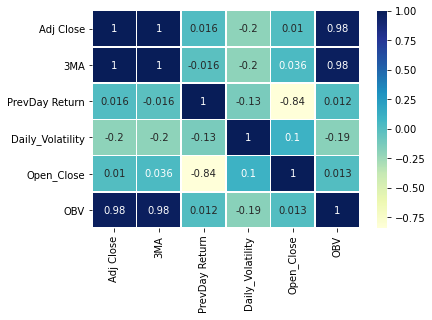

In [119]:
# Checking correlation between dependent and independent variables.
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap(df.corr(), linewidth=0.5, annot=True, cmap="YlGnBu")
plt.show()

In [120]:
# Removed first 3 rows and last 1 row as they have null values.
model_df=df[3:-1]

In [121]:
model_df

Adj Close           3MA  PrevDay Return  Daily_Volatility  \
2013-01-24   6019.350098   6061.699870        0.000959          0.008080   
2013-01-25   6074.649902   6040.716634       -0.005773          0.009562   
2013-01-28   6074.799805   6049.433268        0.009187          0.010990   
2013-01-29   6049.899902   6056.266602        0.000025          0.004454   
2013-01-30   6055.750000   6066.449870       -0.004099          0.011477   
...                  ...           ...             ...               ...   
2020-02-20  12080.849609  12054.733399        0.011124          0.007690   
2020-02-24  11829.400391  12066.416667       -0.003715          0.006673   
2020-02-25  11797.900391  12012.050130       -0.020814          0.016858   
2020-02-26  11678.500000  11902.716797       -0.002663          0.008756   
2020-02-27  11633.299805  11768.600261       -0.010120          0.012342   

            Open_Close         OBV  
2013-01-24   -0.000240   -177200.0  
2013-01-25    0.004441    -29600.0  
2013-01-28   -0.008324     83500.0  
2013-01-29    0.001200    -74100.0  
2013-01-30    0.002440     50100.0  
...                ...         ...  
2020-02-20   -0.002920  21185300.0  
2020-02-24    0.003148  20694500.0  
2020-02-25    0.015247  20233500.0  
2020-02-26    0.006702  19665900.0  
2020-02-27    0.005116  19057300.0  

[1747 rows x 6 columns]

In [122]:
# Train Test Split  data (Make sure to consider the data is a time series data)

In [123]:
# Splitting to generate Training Data set
train = model_df[:'2018']
train

Adj Close           3MA  PrevDay Return  Daily_Volatility  \
2013-01-24   6019.350098   6061.699870        0.000959          0.008080   
2013-01-25   6074.649902   6040.716634       -0.005773          0.009562   
2013-01-28   6074.799805   6049.433268        0.009187          0.010990   
2013-01-29   6049.899902   6056.266602        0.000025          0.004454   
2013-01-30   6055.750000   6066.449870       -0.004099          0.011477   
...                  ...           ...             ...               ...   
2018-12-24  10663.500000  10891.000000       -0.018052          0.020952   
2018-12-26  10729.849609  10789.733398       -0.008415          0.012494   
2018-12-27  10779.799805  10715.783203        0.006222          0.020214   
2018-12-28  10859.900391  10724.383138        0.004655          0.006480   
2018-12-31  10862.549805  10789.849935        0.007431          0.007067   

            Open_Close         OBV  
2013-01-24   -0.000240   -177200.0  
2013-01-25    0.004441    -29600.0  
2013-01-28   -0.008324     83500.0  
2013-01-29    0.001200    -74100.0  
2013-01-30    0.002440     50100.0  
...                ...         ...  
2018-12-24    0.017384  14653800.0  
2018-12-26    0.010890  14917500.0  
2018-12-27   -0.008876  15373600.0  
2018-12-28    0.003522  15619100.0  
2018-12-31   -0.003600  15800000.0  

[1463 rows x 6 columns]

In [124]:
# Splitting to generate Testing Data set
test = model_df['2019':]
test

Adj Close           3MA  PrevDay Return  Daily_Volatility  \
2019-01-01  10862.549805  10834.083334        0.000244          0.006482   
2019-01-02  10792.500000  10861.666667        0.000000          0.006482   
2019-01-03  10672.250000  10839.199870       -0.006449          0.014932   
2019-01-04  10727.349609  10775.766602       -0.011142          0.014332   
2019-01-07  10771.799805  10730.699870        0.005163          0.010575   
...                  ...           ...             ...               ...   
2020-02-20  12080.849609  12054.733399        0.011124          0.007690   
2020-02-24  11829.400391  12066.416667       -0.003715          0.006673   
2020-02-25  11797.900391  12012.050130       -0.020814          0.016858   
2020-02-26  11678.500000  11902.716797       -0.002663          0.008756   
2020-02-27  11633.299805  11768.600261       -0.010120          0.012342   

            Open_Close         OBV  
2019-01-01    0.004641  15800000.0  
2019-01-02    0.004641  15490300.0  
2019-01-03    0.007025  15204100.0  
2019-01-04    0.011536  15500700.0  
2019-01-07   -0.002584  15770100.0  
...                ...         ...  
2020-02-20   -0.002920  21185300.0  
2020-02-24    0.003148  20694500.0  
2020-02-25    0.015247  20233500.0  
2020-02-26    0.006702  19665900.0  
2020-02-27    0.005116  19057300.0  

[284 rows x 6 columns]

In [126]:
# Splitting Features and Label among Testing and Training data set. 
X_train = train[['3MA', 'PrevDay Return', 'Daily_Volatility', 'Open_Close', 'OBV']]
X_test = test[['3MA', 'PrevDay Return', 'Daily_Volatility', 'Open_Close', 'OBV']] 
y_train = train['Adj Close']
y_test = test['Adj Close']
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1463, 5) (284, 5)
(1463,) (284,)


In [127]:
# Train different Algorithms

# Decision Tree Regressor

In [128]:
from sklearn.tree import DecisionTreeRegressor

In [129]:
model = DecisionTreeRegressor(random_state=5)
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy = model.score(X_test, y_test) #Return the coefficient of determination R^2 of the prediction.
accuracy

0.5936041263724817

In [130]:
# Test performance of the model on the Testing Data using RMSE

In [131]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, preds)) ## Alternate formula - mean_squared_error(y_test, preds, squared=False)
print(rms)

308.89377043345576


# Random Forest Regressor

In [165]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=7)
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy = model.score(X_test, y_test) #Return the coefficient of determination (R^2) of the prediction.
print(f'Accuracy - {accuracy}')
rms = sqrt(mean_squared_error(y_test, preds))
print(f'RMSE - {rms}')

Accuracy - 0.6630751825154273
RMSE - 281.25548832971083


In [166]:
# Hyper parameter Tuning using Grid Search
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()

In [167]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [100, 110, 120],
    'max_features': [3, 4, 5],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [9, 8, 10],
    'n_estimators': [100, 200]
}

In [168]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs = -1, verbose = 2)

In [169]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.6min finished


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [100, 110, 120],
                         'max_features': [3, 4, 5],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [9, 8, 10],
                         'n_estimators': [100, 200]},
             verbose=2)

In [170]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 120,
 'max_features': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

In [171]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=120, max_features=5, min_samples_leaf=4,
                      min_samples_split=8)

In [191]:
model = RandomForestRegressor(max_depth=135, max_features=5, min_samples_leaf=1, min_samples_split=8)
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy = model.score(X_test, y_test) #Return the coefficient of determination (R^2) of the prediction.
print(f'Accuracy - {accuracy}')
rms = sqrt(mean_squared_error(y_test, preds))
print(f'RMSE - {rms}')

Accuracy - 0.6451382688605785
RMSE - 288.6450329067372


# KNN

In [218]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy = model.score(X_test, y_test) #Return the coefficient of determination R^2 of the prediction.
print(f'Accuracy - {accuracy}')
rms = sqrt(mean_squared_error(y_test, preds))
print(f'RMSE - {rms}')

Accuracy - 0.3070377416444602
RMSE - 403.3567191664653


# Gradient Boosting

In [138]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy = model.score(X_test, y_test) #Return the coefficient of determination R^2 of the prediction.
print(f'Accuracy - {accuracy}')
rms = sqrt(mean_squared_error(y_test, preds))
print(f'RMSE - {rms}')

Accuracy - 0.22550584864942436
RMSE - 426.4259014828722


In [139]:
# Hyper parameter Tuning using Random Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [147]:
model = GradientBoostingRegressor()
parameters = {'learning_rate': sp_randFloat(),
              'subsample'    : sp_randFloat(),
              'n_estimators' : sp_randInt(100, 1000),
              'max_depth'    : sp_randInt(4, 10)
             }

In [148]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, n_iter = 10, n_jobs=-1)

In [149]:
randm.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000227664D6760>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022767F8DF10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022767F8DDC0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000227664D6E50>})

In [150]:
randm.best_estimator_

GradientBoostingRegressor(learning_rate=0.23124399696275588, max_depth=7,
                          n_estimators=709, subsample=0.20679939992543173)

In [144]:
randm.best_params_

{'learning_rate': 0.4147117776960525,
 'max_depth': 7,
 'n_estimators': 627,
 'subsample': 0.42639039471179396}

In [151]:
model = GradientBoostingRegressor(learning_rate=0.23124399696275588, max_depth=7,
                          n_estimators=709, subsample=0.20679939992543173)
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy = model.score(X_test, y_test) #Return the coefficient of determination R^2 of the prediction.
print(f'Accuracy - {accuracy}')
rms = sqrt(mean_squared_error(y_test, preds))
print(f'RMSE - {rms}')

Accuracy - 0.6937969017979277
RMSE - 268.126225987088


In [ ]:
# GradientBoosting Model RMSE score initially was 426.42 after tuning it got down to 268.12 
# After the Random Search, it would been good to do Grid Search further optimizing the model.

# XGBoost

In [101]:
#pip install xgboost #In case if you have not installed 

In [137]:
import xgboost
#from xgboost import XGBRegressor
model = xgboost.XGBRegressor(colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=10000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, seed=42) 
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy = model.score(X_test, y_test) #Return the coefficient of determination R^2 of the prediction.
print(f'Accuracy - {accuracy}')
rms = sqrt(mean_squared_error(y_test, preds))
print(f'RMSE - {rms}')

Accuracy - 0.6057795936979811
RMSE - 304.231413759376


# Linear Regression

In [133]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy = model.score(X_test, y_test) #Return the coefficient of determination R^2 of the prediction.
print(f'Accuracy - {accuracy}')
rms = sqrt(mean_squared_error(y_test, preds))
print(f'RMSE - {rms}')

Accuracy - 0.928651017021038
RMSE - 129.4280471601245


In [210]:
df.iloc[-2:]

Adj Close           3MA  PrevDay Return  Daily_Volatility  \
2020-02-27  11633.299805  11768.600261        -0.01012          0.012342   
2020-02-28           NaN  11703.233399        -0.00387          0.011021   

            Open_Close         OBV  
2020-02-27    0.005116  19057300.0  
2020-02-28    0.002397  19057300.0

In [212]:
# Predicted the Adjusted close for Date 2020-02-28
a = np.array([[11703.233399, -0.00387, 0.011021, 0.002397, 19057300.0]])
pred_1dayfwd = model.predict(a)
print(f'Linear Regression Predicts 28-02-2020 Adj Closing as {round(int(pred_1dayfwd),0)}')

Linear Regression Predicts 28-02-2020 Adj Closing as 11659


In [164]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train[['3MA', 'PrevDay Return']], y_train)
preds = model.predict(X_test[['3MA', 'PrevDay Return']])
accuracy = model.score(X_test[['3MA', 'PrevDay Return']], y_test) #Return the coefficient of determination R^2 of the prediction.
print(f'Accuracy - {accuracy}')
rms = sqrt(mean_squared_error(y_test, preds))
print(f'RMSE - {rms}')

Accuracy - 0.9520129139673684
RMSE - 106.1443041574947


In [ ]:
# Linear Regression with just 2 features ('3MA', 'PrevDay Return') is producting better RMSE Score than all the features.

# Conclusion - Linear Regression has the best of RMSE score compared to other models.